# Imports

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels as sm
from scipy.stats import mode
from math import ceil
import os
from sklearn.neighbors import LocalOutlierFactor
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
logging.disable(logging.INFO)

In [2]:
print('Pandas version ',pd.__version__)
print('Numpy version ',np.__version__)
print('Scipy version ',sp.__version__)
print('Seaborn version ',sns.__version__)
print('StatsModels version ',sm.__version__)

Pandas version  1.3.3
Numpy version  1.20.3
Scipy version  1.7.1
Seaborn version  0.11.2
StatsModels version  0.13.2


## Data Understanding

In [3]:
# load data
df = pd.read_excel('WonderfulWinesoftheWorld.xlsx', sheet_name= 'wwwdata1')
# check that data is well loaded
df.head()

,Custid,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
0,5325.0,653.0,55.0,20.0,78473.0,20.0,18.0,826.0,445.0,7.0,67.0,4.0,26.0,2.0,1.0,1.0,36.0,5.0
1,3956.0,1041.0,75.0,18.0,105087.0,36.0,33.0,1852.0,539.0,2.0,49.0,0.0,46.0,1.0,3.0,0.0,20.0,4.0
2,3681.0,666.0,18.0,12.0,27984.0,4.0,56.0,39.0,-7.0,88.0,4.0,29.0,14.0,32.0,21.0,48.0,60.0,8.0
3,2829.0,1049.0,42.0,16.0,61748.0,2.0,46.0,37.0,-6.0,70.0,86.0,1.0,11.0,1.0,1.0,55.0,59.0,7.0
4,8788.0,837.0,47.0,16.0,65789.0,2.0,3.0,36.0,4.0,35.0,85.0,0.0,12.0,2.0,1.0,28.0,63.0,6.0


In [4]:
df.tail()

,Custid,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
9996,4070.0,596.000,66.0000,15.0000,84714.000,18.0000,45.0000,720.0000,391.0000,5.0000,30.0000,12.0000,36.0000,10.0000,12.0000,13.0000,18.0000,2.0000
9997,7909.0,619.000,18.0000,12.0000,40466.000,3.0000,65.0000,47.0000,5.0000,23.0000,6.0000,24.0000,10.0000,38.0000,22.0000,41.0000,58.0000,5.0000
9998,4158.0,1107.000,33.0000,16.0000,53661.000,1.0000,368.0000,15.0000,2.0000,35.0000,18.0000,13.0000,45.0000,11.0000,13.0000,13.0000,60.0000,6.0000
9999,4914.0,979.000,55.0000,16.0000,94926.000,25.0000,28.0000,1148.0000,293.0000,7.0000,63.0000,10.0000,13.0000,11.0000,3.0000,4.0000,34.0000,5.0000
10000,NaN,898.102,47.9273,16.7391,69904.358,14.6281,62.4068,622.5552,209.0712,32.3972,50.3827,7.0545,28.5213,7.0698,6.9474,16.5466,42.3762,5.2166


In [5]:
# drop the last row which corresponds to the average value of each column
df= df.drop(10000, axis = 0)
df.tail()

,Custid,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
9995,1383.0,1132.0,57.0,20.0,81033.0,19.0,59.0,776.0,187.0,22.0,78.0,0.0,20.0,1.0,1.0,11.0,27.0,4.0
9996,4070.0,596.0,66.0,15.0,84714.0,18.0,45.0,720.0,391.0,5.0,30.0,12.0,36.0,10.0,12.0,13.0,18.0,2.0
9997,7909.0,619.0,18.0,12.0,40466.0,3.0,65.0,47.0,5.0,23.0,6.0,24.0,10.0,38.0,22.0,41.0,58.0,5.0
9998,4158.0,1107.0,33.0,16.0,53661.0,1.0,368.0,15.0,2.0,35.0,18.0,13.0,45.0,11.0,13.0,13.0,60.0,6.0
9999,4914.0,979.0,55.0,16.0,94926.0,25.0,28.0,1148.0,293.0,7.0,63.0,10.0,13.0,11.0,3.0,4.0,34.0,5.0


In [6]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Custid       10000 non-null  float64
 1   Dayswus      10000 non-null  float64
 2   Age          10000 non-null  float64
 3   Edu          10000 non-null  float64
 4   Income       10000 non-null  float64
 5   Freq         10000 non-null  float64
 6   Recency      10000 non-null  float64
 7   Monetary     10000 non-null  float64
 8   LTV          10000 non-null  float64
 9   Perdeal      10000 non-null  float64
 10  Dryred       10000 non-null  float64
 11  Sweetred     10000 non-null  float64
 12  Drywh        10000 non-null  float64
 13  Sweetwh      10000 non-null  float64
 14  Dessert      10000 non-null  float64
 15  Exotic       10000 non-null  float64
 16  WebPurchase  10000 non-null  float64
 17  WebVisit     10000 non-null  float64
dtypes: float64(18)
memory usage: 1.4 MB


In [7]:
df.dtypes

Custid         float64
Dayswus        float64
Age            float64
Edu            float64
Income         float64
Freq           float64
Recency        float64
Monetary       float64
LTV            float64
Perdeal        float64
Dryred         float64
Sweetred       float64
Drywh          float64
Sweetwh        float64
Dessert        float64
Exotic         float64
WebPurchase    float64
WebVisit       float64
dtype: object

In [8]:
df['Age'].value_counts()

63.0    190
65.0    188
22.0    188
53.0    187
35.0    186
       ... 
24.0    149
58.0    144
33.0    139
18.0     90
78.0     81
Name: Age, Length: 61, dtype: int64

In [9]:
df.isnull().sum() #no null values

Custid         0
Dayswus        0
Age            0
Edu            0
Income         0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
dtype: int64

In [10]:
print( str(df.isnull().sum().sum()) + " out of " + str(len(df)) + " or " + str(round((df.isnull().sum().sum()/len(df))*100,2)) + "% of rows have null values")

0 out of 10000 or 0.0% of rows have null values


In [11]:
df.describe(include = 'all').T #descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Custid,10000.0,6000.5000,2886.895680,1001.0,3500.75,6000.5,8500.25,11000.0
Dayswus,10000.0,898.1020,202.492789,550.0,723.75,894.0,1074.00,1250.0
Age,10000.0,47.9273,17.302721,18.0,33.00,48.0,63.00,78.0
Edu,10000.0,16.7391,1.876375,12.0,15.00,17.0,18.00,20.0
Income,10000.0,69904.3580,27612.233311,10000.0,47642.00,70012.0,92147.00,140628.0
Freq,10000.0,14.6281,11.969073,1.0,4.00,12.0,24.00,56.0
Recency,10000.0,62.4068,69.874255,0.0,26.00,52.0,78.25,549.0
Monetary,10000.0,622.5552,647.135323,6.0,63.00,383.0,1077.00,3052.0
LTV,10000.0,209.0712,291.986040,-178.0,-2.00,57.0,364.00,1791.0
Perdeal,10000.0,32.3972,27.897094,0.0,6.00,25.0,56.00,97.0


In [12]:
df.loc[df.duplicated(keep = False), :] #no duplicated entries

,Custid,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit


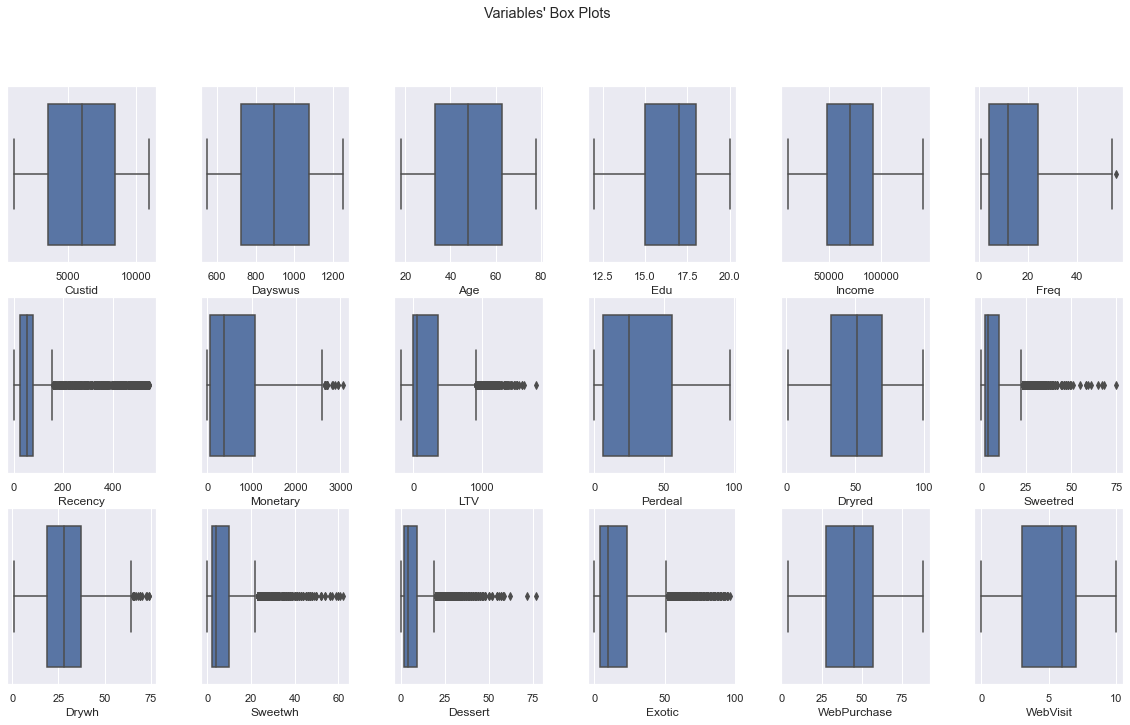

In [13]:
# All Variables Box Plots in one figure

def Boxplot(df):
    sns. set ()
    variables = df.columns.to_list()
    fig, axes = plt.subplots (3, ceil((len(df.columns))/3), figsize=(20, 11))
    for ax, feat in zip (axes.flatten (), variables):
        sns.boxplot (x=df[feat], ax=ax)
    title = "Variables' Box Plots"
    plt.suptitle (title)
    plt.subplots_adjust (wspace=0.3)
    
    plt.show()

Boxplot(df) #boxplot from the original dataset

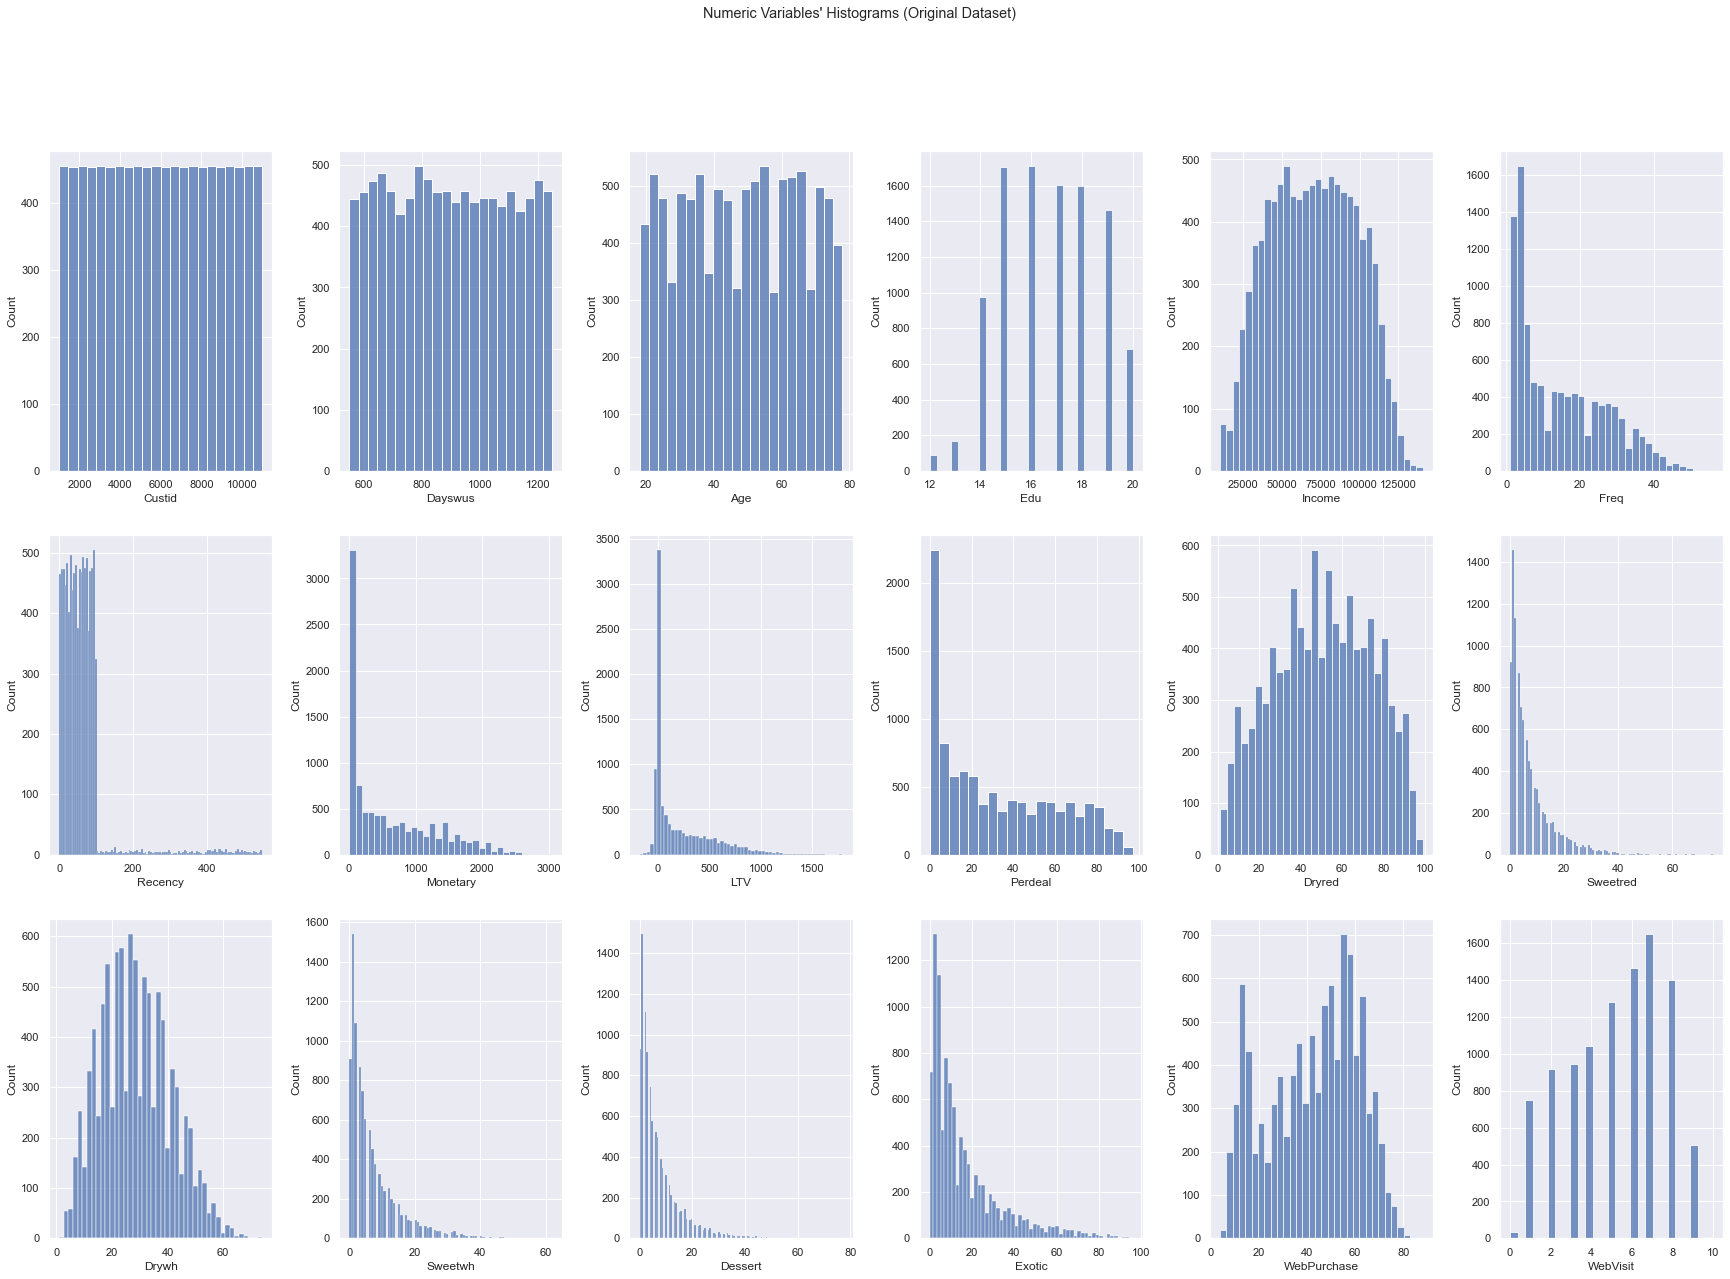

In [14]:
# All Variables Box Plots in one figure
sns. set ()

#Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots (3, ceil((len(df.columns.to_list()))/3), figsize=(30, 20))
                          
# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip (axes.flatten (), df.columns.to_list()):
    sns.histplot (x=df[feat], ax=ax)

# Layout

# Add a centered title to the figure:
title = "Numeric Variables' Histograms (Original Dataset)"
plt.suptitle (title)
plt.subplots_adjust (wspace=0.3)

plt.show()

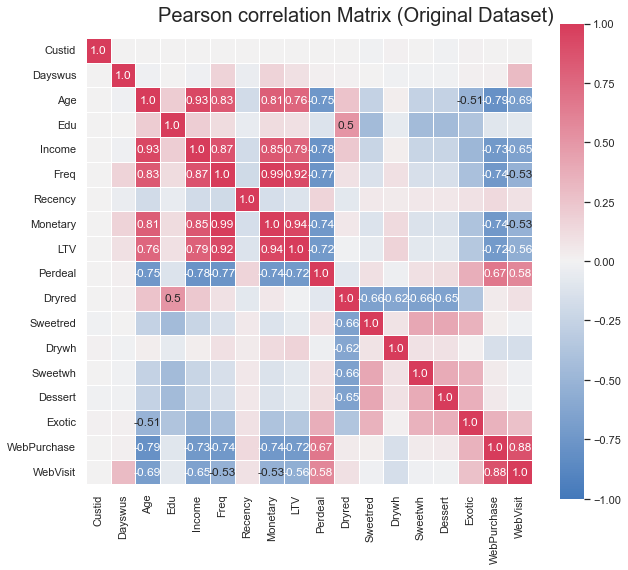

In [15]:
# Prepare figure
fig = plt.figure (figsize=(10, 8))

# obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round () method.
corr = np.round (df[df.columns.to_list()].corr (method="pearson"), decimals=2)

# Build' annotation matrix (values above 0.5 will appear annotated in the plot)
mask_annot = np.absolute (corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full (corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette (250, 5, as_cmap=True),
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)

# Layout
fig.subplots_adjust (top=0.95)
fig.suptitle("Pearson correlation Matrix (Original Dataset)", fontsize=20)
plt.savefig('corr_matrix_originaldataset.png', bbox_inches='tight')

plt.show()

In [16]:
((df['WebVisit'] > 7) & (df['Age'] > 48)).sum() # only 258 customers that are above 49 years old registered more than 7 website visits per month, on average 

258

In [17]:
((df['WebVisit'] > 7) & (df['Age'] < 48)).sum()

1621

In [18]:
((df['WebVisit'] < 7) & (df['Age'] > 48)).sum()

4287

In [19]:
((df['WebVisit'] < 7) & (df['Age'] < 48)).sum()

2053

In [20]:
((df['LTV'] > 209) & (df['Age'] > 48)).sum() 

3369

In [21]:
((df['LTV'] > 209) & (df['Age'] < 48)).sum() 

129

In [22]:
((df['LTV'] < 209) & (df['Age'] < 48)).sum()

4765

In [23]:
((df['LTV'] < 209) & (df['Age'] > 48)).sum()

1559

## Checking the variance

In [24]:
#check the variance of each feature
df.var()

Custid         8.334167e+06
Dayswus        4.100333e+04
Age            2.993842e+02
Edu            3.520783e+00
Income         7.624354e+08
Freq           1.432587e+02
Recency        4.882412e+03
Monetary       4.187841e+05
LTV            8.525585e+04
Perdeal        7.782479e+02
Dryred         5.500814e+02
Sweetred       6.188252e+01
Drywh          1.583560e+02
Sweetwh        6.424155e+01
Dessert        6.208724e+01
Exotic         2.974822e+02
WebPurchase    3.430668e+02
WebVisit       5.431028e+00
dtype: float64

## Data Preparation

In [25]:
df = df.drop ('Custid', axis = 1) #dropping Custid because it didn't provide us important information

In [26]:
df.replace(['', '?', '!', ',', '.','/', '@'], np.nan, inplace=True) # replace 

# change data types of some variable
df[['Dayswus','Age','Edu','Freq','Recency','WebVisit']] = df[['Dayswus','Age','Edu','Freq','Recency','WebVisit']].astype(int)

In [27]:
# Preserving the original df
df1 = df.copy()

### Outliers' Removal

#### IQR Approach

In [28]:
def getIQR(df, colname) :
    Q25 = df[colname].quantile(0.25)
    Q75 = df[colname].quantile(0.75)
    IQR = (Q75 - Q25)

    upper_lim = Q75 + 1.5 * IQR
    lower_lim = Q25 - 1.5 * IQR

    above_upper_lim = df.loc[df[colname]>upper_lim]
    below_lower_lim = df.loc[df[colname]<lower_lim]
    
    if len(above_upper_lim) > 0 :
        print(str(len(above_upper_lim)) + " or " + str(round((100*len(above_upper_lim)/len(df)),4)) + "% of rows are above the Upper Limit.")
    if len(below_lower_lim) > 0 :
        print(str(len(below_lower_lim)) + " or " + str(round((100*len(below_lower_lim)/len(df)),4)) + "% of rows are below the Lower Limit.")

    
    return upper_lim, lower_lim, len(above_upper_lim), len(below_lower_lim)

In [29]:
rowsAboveUL = 0
rowsBelowLL = 0

for f in df1.columns:
    print("\n" + f)
    cmv_ul, cmv_ll, count_ul, count_ll = getIQR(df1,f)
    rowsAboveUL += count_ul
    rowsBelowLL += count_ll

print("\nIn total, " + str(rowsAboveUL+rowsBelowLL) + " rows are beyond upper and lower limits based on IQR." + "This is " + str(100*(rowsAboveUL+rowsBelowLL)/len(df1)) + "% of the dataset.")


Dayswus

Age

Edu

Income

Freq
1 or 0.01% of rows are above the Upper Limit.

Recency
385 or 3.85% of rows are above the Upper Limit.

Monetary
23 or 0.23% of rows are above the Upper Limit.

LTV
322 or 3.22% of rows are above the Upper Limit.

Perdeal

Dryred

Sweetred
565 or 5.65% of rows are above the Upper Limit.

Drywh
22 or 0.22% of rows are above the Upper Limit.

Sweetwh
576 or 5.76% of rows are above the Upper Limit.

Dessert
756 or 7.56% of rows are above the Upper Limit.

Exotic
590 or 5.9% of rows are above the Upper Limit.

WebPurchase

WebVisit

In total, 3240 rows are beyond upper and lower limits based on IQR.This is 32.4% of the dataset.


There are too many rows that are beyond the IQR limits to make a blanket rule that removes them.

We inspect each variable individually.

####  Manual Approach

In [30]:
# outlier filters
filters = ( 
    (df1['Recency'] <= 400)
    &
    (df1['LTV']<=1500)
    &
    (df1['Sweetred']<=50)
    &
    (df1['Drywh']<=80)
    &
    (df1['Sweetwh']<=50)
    &
    (df1['Dessert']<=50)
    &
    (df1['Exotic']<=90)
)

clean_data = df1[filters]

print('Percentage of data kept:', np.round(clean_data.shape[0] / df1.shape[0], 3))

Percentage of data kept: 0.978


#### Local Outlier Factor

In [31]:
# Outlier treatment Using Local Outlier Factor to identify and remove outliers
# make a copy of the cleaned dta

df_LOF = df1.copy()
variables = df_LOF.columns.to_list()

In [32]:
# normalize and transform the data 

scaler = StandardScaler()
scaler.fit(df_LOF)
df_LOF[variables] = scaler.transform(df_LOF[variables])

# transform data
LOF = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=20, metric='euclidean')
obs_labels = LOF.fit_predict(df_LOF)
df_LOF = pd.concat((df1.reset_index(), pd.Series(obs_labels, name='Labels')), axis = 1)

print('Proportion of data removed from the dataframe:', df_LOF[df_LOF['Labels'] == -1].shape[0] / df1.shape[0])
df_LOF.drop(df_LOF[df_LOF['Labels'] == -1].index, inplace = True)
df_LOF.drop(columns='Labels', inplace=True)
df_LOF.set_index('index', inplace=True)

Proportion of data removed from the dataframe: 0.0003


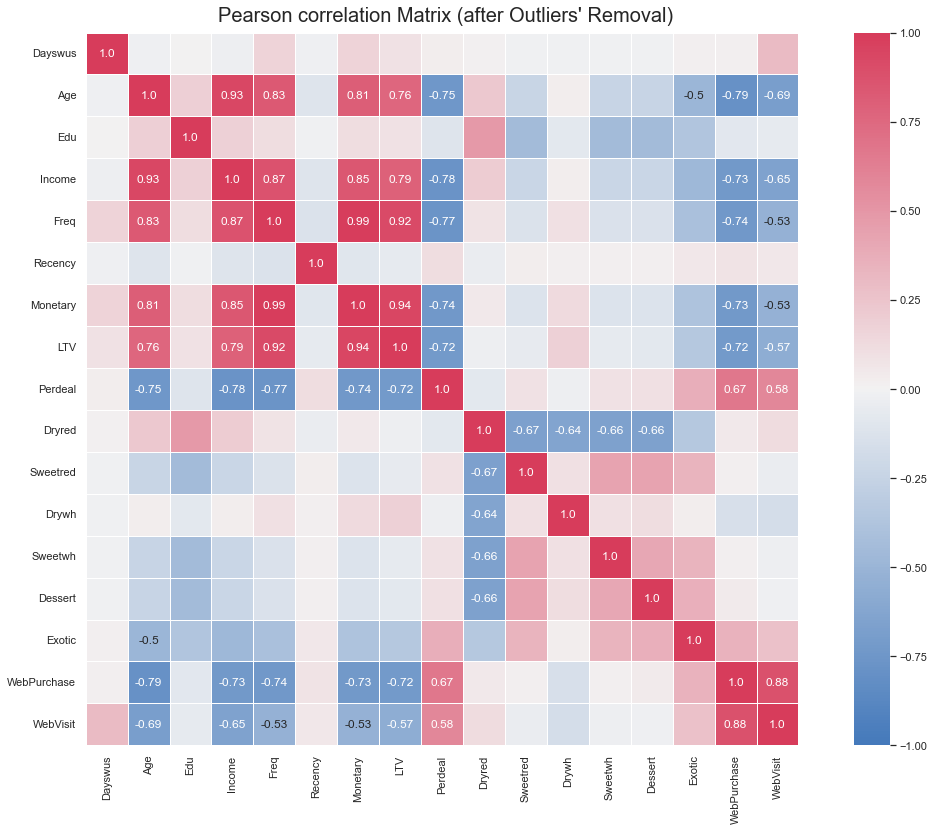

In [33]:
# re_check the correlation 
fig = plt.figure (figsize=(20,12))

# obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round () method.
corr = np.round (clean_data[clean_data.columns.to_list()].corr (method="pearson"), decimals=2)

# Build' annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute (corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full (corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette (250, 5, as_cmap=True),
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)

# Layout
fig.subplots_adjust (top=0.95)
fig.suptitle("Pearson correlation Matrix (after Outliers' Removal)", fontsize=20)

plt.show()

### Discretization

In [34]:
new_data = clean_data.copy()

In [35]:
new_data.reset_index(inplace = True)

In [36]:
new_data.drop('index', axis = 1, inplace = True)

In [37]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Dayswus,9776.0,898.627557,202.391077,550.0,724.00,895.0,1075.00,1250.0
Age,9776.0,48.347688,17.171556,18.0,34.00,49.0,63.00,78.0
Edu,9776.0,16.764935,1.865060,12.0,15.00,17.0,18.00,20.0
Income,9776.0,70564.890344,27383.344465,10000.0,48598.25,70914.5,92658.25,139730.0
Freq,9776.0,14.889935,11.898546,1.0,4.00,12.0,24.00,54.0
Recency,9776.0,55.282222,44.762201,0.0,26.00,52.0,77.00,400.0
Monetary,9776.0,634.110168,645.504274,6.0,65.00,389.5,1082.00,2938.0
LTV,9776.0,212.582140,290.990782,-178.0,-2.00,63.0,371.00,1496.0
Perdeal,9776.0,31.855565,27.757164,0.0,6.00,24.0,55.00,97.0
Dryred,9776.0,50.787439,23.265474,1.0,33.00,51.0,70.00,99.0


In [38]:
#Age
new_data['AgeGroup'] = new_data['Age']
new_data.iloc[new_data[(new_data['Age']>17) & (new_data['Age']<38)].index, -1] = '18-37'  
new_data.iloc[new_data[(new_data['Age']>37) & (new_data['Age']<58)].index, -1] = '38-57'   
new_data.iloc[new_data[(new_data['Age']>57)].index, -1] = '58-78'   
new_data.drop('Age', axis=1, inplace=True) 
new_data['AgeGroup'].value_counts()

58-78    3387
38-57    3313
18-37    3076
Name: AgeGroup, dtype: int64

In [39]:
#WebVisit
new_data['NumberWebVisit'] = new_data['WebVisit']
new_data['NumberWebVisit'] = new_data['NumberWebVisit'].astype(int)
new_data.iloc[new_data[(new_data['WebVisit']<5.1)].index, -1] = '5orlessvisits'  #5 is the average value
new_data.iloc[new_data[(new_data['WebVisit']>5)].index, -1] = 'morethan5visits'    
new_data.drop('WebVisit', axis=1, inplace=True) 
new_data['NumberWebVisit'].value_counts()

5orlessvisits      4916
morethan5visits    4860
Name: NumberWebVisit, dtype: int64

In [40]:
#Perdeal
new_data['DiscountGroup'] = new_data['Perdeal']
new_data.iloc[new_data[(new_data['Perdeal']<32.1)].index, -1] = '32orlessdisc' 
new_data.iloc[new_data[(new_data['Perdeal']>32)].index, -1] = 'above32disc'  #more than 32% of its purchases are on discount 
new_data.drop('Perdeal', axis=1, inplace=True) 
new_data['DiscountGroup'].value_counts()

32orlessdisc    5620
above32disc     4156
Name: DiscountGroup, dtype: int64

In [41]:
#defining categorical and numerical variables
cat = ["AgeGroup", "NumberWebVisit", "DiscountGroup"]
num = new_data.columns.drop(cat).to_list()

In [42]:
new_data['AvgAmountperVisit'] = new_data['Monetary']/new_data['Freq'] # Average Amount Spent per visit (last 18 months)
num.append('AvgAmountperVisit')
new_data.head()

,Dayswus,Edu,Income,Freq,Recency,Monetary,LTV,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,AgeGroup,NumberWebVisit,DiscountGroup,AvgAmountperVisit
0,653,20,78473.0,20,18,826.0,445.0,67.0,4.0,26.0,2.0,1.0,1.0,36.0,38-57,5orlessvisits,32orlessdisc,41.300000
1,1041,18,105087.0,36,33,1852.0,539.0,49.0,0.0,46.0,1.0,3.0,0.0,20.0,58-78,5orlessvisits,32orlessdisc,51.444444
2,666,12,27984.0,4,56,39.0,-7.0,4.0,29.0,14.0,32.0,21.0,48.0,60.0,18-37,morethan5visits,above32disc,9.750000
3,1049,16,61748.0,2,46,37.0,-6.0,86.0,1.0,11.0,1.0,1.0,55.0,59.0,38-57,morethan5visits,above32disc,18.500000
4,837,16,65789.0,2,3,36.0,4.0,85.0,0.0,12.0,2.0,1.0,28.0,63.0,38-57,morethan5visits,above32disc,18.000000


In [43]:
# Dropping converted columns
new_data.drop(['Freq', 'Monetary'], axis=1, inplace=True)

#Updating the num list
num.remove('Freq')
num.remove('Monetary')

new_data.head()

,Dayswus,Edu,Income,Recency,LTV,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,AgeGroup,NumberWebVisit,DiscountGroup,AvgAmountperVisit
0,653,20,78473.0,18,445.0,67.0,4.0,26.0,2.0,1.0,1.0,36.0,38-57,5orlessvisits,32orlessdisc,41.300000
1,1041,18,105087.0,33,539.0,49.0,0.0,46.0,1.0,3.0,0.0,20.0,58-78,5orlessvisits,32orlessdisc,51.444444
2,666,12,27984.0,56,-7.0,4.0,29.0,14.0,32.0,21.0,48.0,60.0,18-37,morethan5visits,above32disc,9.750000
3,1049,16,61748.0,46,-6.0,86.0,1.0,11.0,1.0,1.0,55.0,59.0,38-57,morethan5visits,above32disc,18.500000
4,837,16,65789.0,3,4.0,85.0,0.0,12.0,2.0,1.0,28.0,63.0,38-57,morethan5visits,above32disc,18.000000


In [44]:
new_data['AvgAmountperVisit'].mean()

32.28686748518039

In [45]:
#AverageAmountperVisit
new_data['AvgAmountVisit'] = new_data['AvgAmountperVisit']
new_data.iloc[new_data[(new_data['AvgAmountperVisit']<=32)].index, -1] = 'AverageAmountorless'  #32 is the average value
new_data.iloc[new_data[(new_data['AvgAmountperVisit']>32)].index, -1] = 'AboveAverageAmount'    
new_data.drop('AvgAmountperVisit', axis=1, inplace=True) 
new_data['AvgAmountVisit'].value_counts()

AboveAverageAmount     4970
AverageAmountorless    4806
Name: AvgAmountVisit, dtype: int64

In [46]:
#updating "cat" list and removing the variable from "num" list
cat.append('AvgAmountVisit')
num.remove('AvgAmountperVisit')

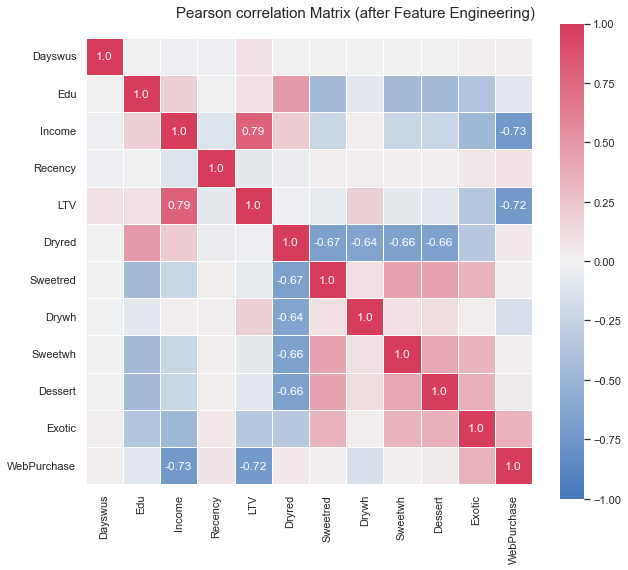

In [47]:
# re_check the correlation 
fig = plt.figure (figsize=(10, 8))

# obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round () method.
corr = np.round (new_data[num].corr (method="pearson"), decimals=2)

# Build' annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute (corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full (corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette (250, 5, as_cmap=True),
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)

# Layout
fig.subplots_adjust (top=0.95)
fig.suptitle("Pearson correlation Matrix (after Feature Engineering)", fontsize=15)

plt.show()

In [48]:
new_data

,Dayswus,Edu,Income,Recency,LTV,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,AgeGroup,NumberWebVisit,DiscountGroup,AvgAmountVisit
0,653,20,78473.0,18,445.0,67.0,4.0,26.0,2.0,1.0,1.0,36.0,38-57,5orlessvisits,32orlessdisc,AboveAverageAmount
1,1041,18,105087.0,33,539.0,49.0,0.0,46.0,1.0,3.0,0.0,20.0,58-78,5orlessvisits,32orlessdisc,AboveAverageAmount
2,666,12,27984.0,56,-7.0,4.0,29.0,14.0,32.0,21.0,48.0,60.0,18-37,morethan5visits,above32disc,AverageAmountorless
3,1049,16,61748.0,46,-6.0,86.0,1.0,11.0,1.0,1.0,55.0,59.0,38-57,morethan5visits,above32disc,AverageAmountorless
4,837,16,65789.0,3,4.0,85.0,0.0,12.0,2.0,1.0,28.0,63.0,38-57,morethan5visits,above32disc,AverageAmountorless
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9771,1132,20,81033.0,59,187.0,78.0,0.0,20.0,1.0,1.0,11.0,27.0,38-57,5orlessvisits,32orlessdisc,AboveAverageAmount
9772,596,15,84714.0,45,391.0,30.0,12.0,36.0,10.0,12.0,13.0,18.0,58-78,5orlessvisits,32orlessdisc,AboveAverageAmount
9773,619,12,40466.0,65,5.0,6.0,24.0,10.0,38.0,22.0,41.0,58.0,18-37,5orlessvisits,32orlessdisc,AverageAmountorless
9774,1107,16,53661.0,368,2.0,18.0,13.0,45.0,11.0,13.0,13.0,60.0,18-37,morethan5visits,above32disc,AverageAmountorless


## Data Normalization

### Numeric Variables

In [49]:
df_standard = new_data.copy()
df_standard[num] = StandardScaler().fit_transform(df_standard[num]) #better for results' interpretation

### Categorical Variables

In [50]:
ohc = OneHotEncoder(sparse=False, drop='if_binary') # encode categoric features, columns dropped for binary features
ohc_fit = ohc.fit_transform(df_standard[cat])
ohc_cat = pd.DataFrame(ohc_fit, index=df_standard.index, columns=ohc.get_feature_names()).astype('int') 
ohc_cat

,x0_18-37,x0_38-57,x0_58-78,x1_morethan5visits,x2_above32disc,x3_AverageAmountorless
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,1,1,1
3,0,1,0,1,1,1
4,0,1,0,1,1,1
...,...,...,...,...,...,...
9771,0,1,0,0,0,0
9772,0,0,1,0,0,0
9773,1,0,0,0,0,1
9774,1,0,0,1,1,1


In [51]:
final_data = pd.concat([df_standard.drop(columns=cat), ohc_cat], axis=1) # merge enconded categorical variables
final_data.head(5)

,Dayswus,Edu,Income,Recency,LTV,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,x0_18-37,x0_38-57,x0_58-78,x1_morethan5visits,x2_above32disc,x3_AverageAmountorless
0,-1.213690,1.734653,0.288807,-0.832938,0.798753,0.696886,-0.384691,-0.200649,-0.637531,-0.767261,-0.903412,-0.327499,0,1,0,0,0,0
1,0.703488,0.662246,1.260762,-0.497816,1.121804,-0.076832,-0.910301,1.389446,-0.766684,-0.502652,-0.962881,-1.191971,0,0,1,0,0,0
2,-1.149455,-2.554974,-1.555072,0.016036,-0.754640,-2.011127,2.900373,-1.154705,3.237040,1.878831,1.891635,0.969210,1,0,0,1,1,1
3,0.743018,-0.410160,-0.321997,-0.207378,-0.751204,1.513589,-0.778899,-1.393219,-0.766684,-0.767261,2.307918,0.915180,0,1,0,1,1,1
4,-0.304513,-0.410160,-0.174418,-1.168059,-0.716836,1.470605,-0.910301,-1.313715,-0.637531,-0.767261,0.702253,1.131298,0,1,0,1,1,1


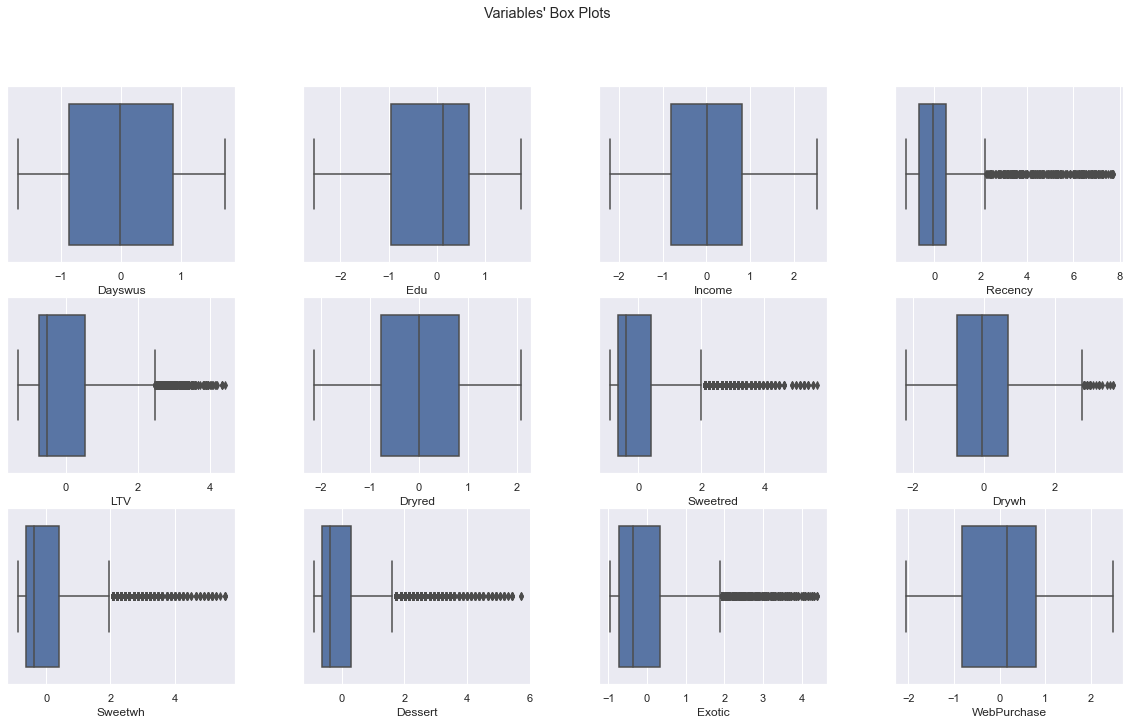

In [52]:
Boxplot(final_data[num])

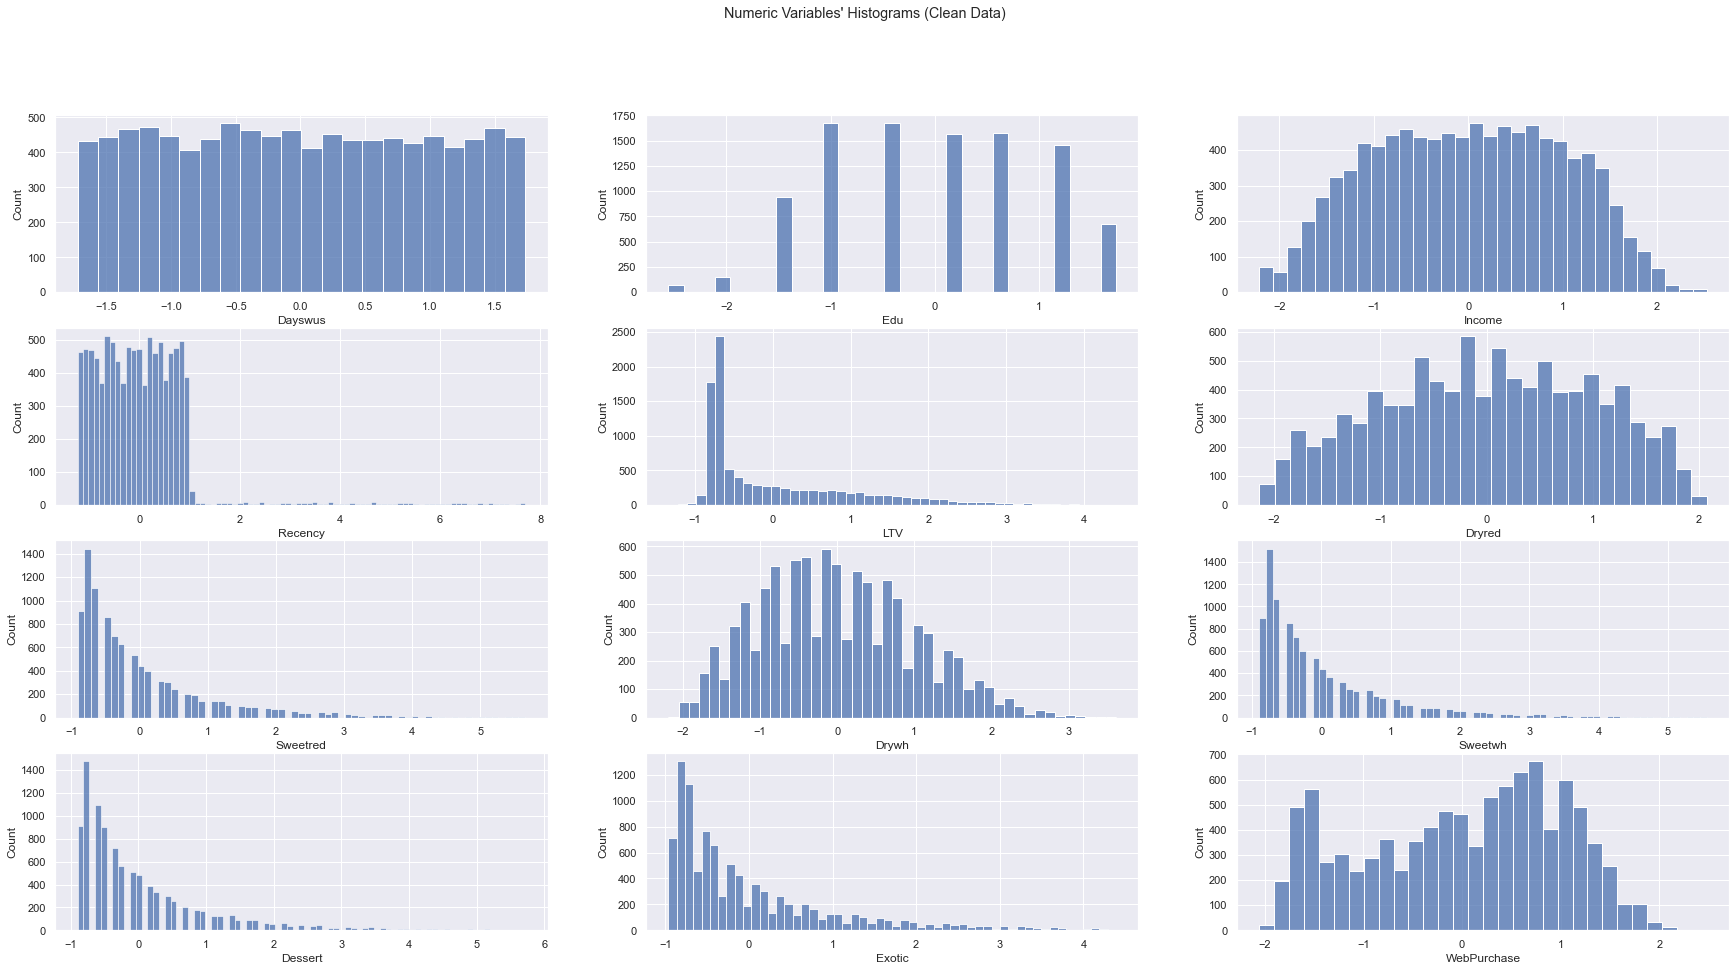

In [53]:
# numeric features' histograms
sns.set()
fig, axes = plt.subplots(4,3, figsize=(30, 15))

for ax, feat in zip(axes.flatten(),num):
    sns.histplot(x=final_data[feat], ax=ax)
    
title = "Numeric Variables' Histograms (Clean Data)"
plt.suptitle(title)
plt.show()

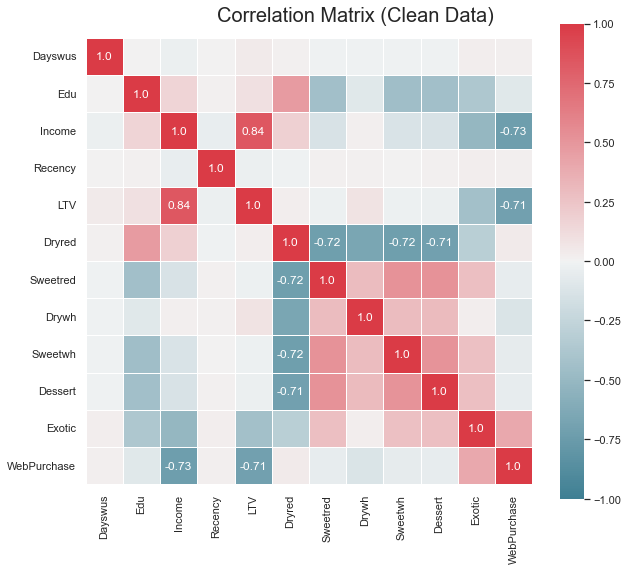

In [54]:
# numeric features' correlation matrix 

fig = plt.figure(figsize=(10, 8))

corr = np.round(final_data[num].corr(method="spearman"), decimals=2)

mask_annot = np.absolute(corr.values) >= 0.7
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix (Clean Data)", fontsize=20)
plt.savefig('corr_matrix_finaldataset.png', bbox_inches='tight')
plt.show()

In [55]:
final_data.to_csv('clean_dataset.csv', index=False)